Enter keyword or hashtag to search about: covid
Enter how many tweets you want to analyse:  122
How people are reacting on covid by analyzing 122 Tweets. 
Positive


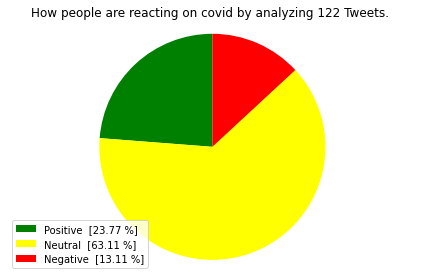

In [7]:
from textblob import TextBlob
import sys, tweepy
import matplotlib.pyplot as plt

def percentage(part, whole):
    return 100*float(part)/float(whole)

consumerKey = "O6YTYHm94J0hkoNPBW75Cr4ii"
consumerSecret = "Vw2Y0kpQ6jIF6OOidZGV6rYeQwtAwKs8tSQnlkPkdYrz9BQxGB"
accessToken = "1425732915598565387-GzpuPLH6ldqq0wAS60VxGbNpm3NiAC"
accessTokenSecret = "KXSxy6pRb0zMNMYpZhdMMYODIbE5TSmYC3Dk1YZdhMWiP"

auth = tweepy.OAuthHandler(consumerKey, consumerSecret)
auth.set_access_token(accessToken, accessTokenSecret)

api = tweepy.API(auth)

searchTerm = input("Enter keyword or hashtag to search about: ")

noOfSearchTerms = int(input("Enter how many tweets you want to analyse:  "))

tweets = tweepy.Cursor(api.search, q=searchTerm).items(noOfSearchTerms)

positive = 0
negative = 0
neutral = 0
polarity = 0

for tweet in tweets:
    #print(tweet.text)
    analysis = TextBlob(tweet.text)
    polarity += analysis.sentiment.polarity

    if(analysis.sentiment.polarity == 0):
        neutral += 1

    elif(analysis.sentiment.polarity < 0):
        negative += 1

    elif(analysis.sentiment.polarity > 0):
        positive += 1


positive = percentage(positive, noOfSearchTerms)
negative = percentage(negative, noOfSearchTerms)
neutral = percentage(neutral, noOfSearchTerms)
polarity = percentage(polarity, noOfSearchTerms)

positive = format(positive, '.2f')
negative = format(negative, '.2f')
neutral = format(neutral, '.2f')


print("How people are reacting on "+ searchTerm + " by analyzing "+ str(noOfSearchTerms) + " Tweets. ")

if(polarity == 0):
    print("Nuetral")

elif(polarity > 0.00):
    print("Positive")

elif(polarity < 0.00):
    print("Negative")



labels = ['Positive  ['+str(positive)+' %]','Neutral  ['+str(neutral)+' %]','Negative  ['+str(negative)+' %]']

sizes = [positive, neutral, negative]

colors = ['green', 'yellow', 'red']

patches, text = plt.pie(sizes, colors=colors, startangle=90)

plt.legend(patches, labels, loc="best")

plt.title('How people are reacting on '+ searchTerm + ' by analyzing '+ str(noOfSearchTerms) + ' Tweets. ')

plt.axis('equal')

plt.tight_layout()

plt.show()